# Dataframe analysis

This notebook explores the analysis of the dataframe describing CanProCo patients from M0 and CanProCo patients from M12 (the latter's lesion segmentation were infered using 3d nnUNet)
It looks at correlation between age, phenotypes, nb of lesions and distribution of lesions. 

More in details it details : 
- patient
- site
- sex
- age
- phenotype
- pathology
- EDSS
- number of lesions
- volume of lesions
- lenght of lesions
- lesion per vertebral levels

Author : Pierre-Louis Benveniste

### Library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import yaml
from prettytable import PrettyTable
import ptitprince as pt


# Dataframe import

We import the dataframe and exclude the subjects which are in the `exclude.yml` file. 

In [2]:
#load dataframes
df_M0_path = '/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/dataframes/dataframe_M0/dataframe.csv'
df_M0_all = pd.read_csv(df_M0_path)
df_M12_path = '/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/dataframes/dataframe_M12_3d/dataframe.csv'
df_M12_all = pd.read_csv(df_M12_path)

We replace NaN values by 0 in the dataset


In [3]:
#we replace all the NaN values by 0
df_M0_all = df_M0_all.fillna(0)
df_M12_all = df_M12_all.fillna(0)

# General statistics

Here we compute general statistics about the dataset:
- number of participant
- number of healthy control
- age distribution
- proportion of male/female
- number and proportion per edss/phenotype

Number of participants:  289
Number of females: 202 (70%)
Number of males: 87 (30%)

Number of healthy participants: 40 (14%)
Number of MS participants: 249 (86%)

Age distribution:


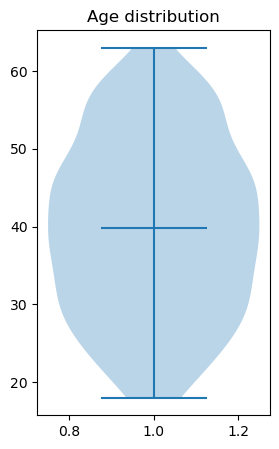

In [4]:
#number of participants
nb_participant = len(df_M0_all.participant_id)
#number of female participants
nb_female = len(df_M0_all[df_M0_all.sex == 'F'])
#number of male participants
nb_male = len(df_M0_all[df_M0_all.sex == 'M'])
#number of healthy patients
nb_healthy = len(df_M0_all[df_M0_all.pathology == 'HC'])
#number of MS patients
nb_MS = len(df_M0_all[df_M0_all.pathology == 'MS'])

#now we print them all:
print('Number of participants: ', nb_participant)
print('Number of females: '+ str(nb_female) + " (" + str(round(nb_female/nb_participant*100)) + "%)")
print('Number of males: '+ str(nb_male) + " (" + str(round(nb_male/nb_participant*100)) + "%)\n")
print('Number of healthy participants: '+ str(nb_healthy) + " (" + str(round(nb_healthy/nb_participant*100)) + "%)")
print('Number of MS participants: '+ str(nb_MS) + " (" + str(round(nb_MS/nb_participant*100)) + "%)\n")
print('Age distribution:')
#print(df_M0_all.age.describe())

# Uncomment to see boxplot of age distribution
#now we can plot the age distribution
plt.figure(figsize=(3, 5))
plt.violinplot(df_M0_all.age, showmeans=True)
plt.title('Age distribution')
plt.show()

For the latter analysis we remove the healthy subjects from the dataframes to study MS in particular

In [5]:
#removal of healthy controls
df_M0 = df_M0_all[df_M0_all.pathology != 'HC']
df_M12 = df_M12_all[df_M12_all.pathology != 'HC']

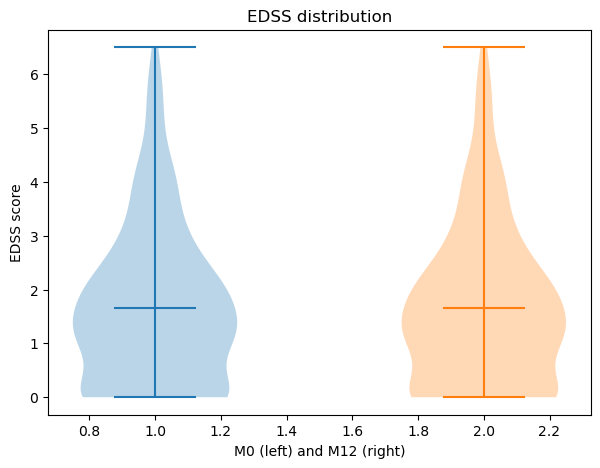

+--------+--------+--------+
|  EDSS  |   M0   |  M12   |
+--------+--------+--------+
|  Mean  | 1.6627 | 1.6627 |
| Median |  1.5   |  1.5   |
+--------+--------+--------+


In [6]:
#now we can plot the edss distribution 
plt.figure(figsize=(7, 5))
plt.violinplot(df_M0.edss.dropna(), showmeans=True, positions=[1])
plt.violinplot(df_M12.edss.dropna(), showmeans=True, positions=[2])
plt.xlabel('M0 (left) and M12 (right)')
plt.ylabel('EDSS score')
plt.title('EDSS distribution')
plt.show()

#we print a table for comparison of the edss scores
table = PrettyTable()
table.field_names = ['EDSS', 'M0', 'M12']
table.add_row(['Mean', round(df_M0.edss.dropna().mean(),4), round(df_M12.edss.dropna().mean(),4)])
table.add_row(['Median', round(df_M0.edss.dropna().median(),4), round(df_M12.edss.dropna().median(),4)])
print(table)

In [7]:
#we add the timepoint to the dataframe 
df_M0['timepoint'] = 'M0'
df_M12['timepoint'] = 'M12'

/var/folders/39/xt15x04d55900qfkrrsvtymw0000gn/T/ipykernel_23213/3800180276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M0['timepoint'] = 'M0'
/var/folders/39/xt15x04d55900qfkrrsvtymw0000gn/T/ipykernel_23213/3800180276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M12['timepoint'] = 'M12'


+------------+-----------+-----------+
| Phenotypes |     M0    |    M12    |
+------------+-----------+-----------+
|    PPMS    |  45 (18%) |  45 (18%) |
|    RIS     |  46 (18%) |  46 (18%) |
|    RRMS    | 158 (63%) | 158 (63%) |
+------------+-----------+-----------+


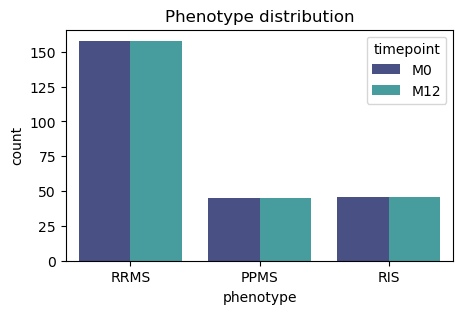

In [8]:
# now we can concatenate the two dataframes
df_concat = pd.concat([df_M0, df_M12])

# now we can plot the phenotype distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=df_concat, x='phenotype', hue='timepoint', palette='mako')
plt.title('Phenotype distribution')

#now we print a table with the results
table = PrettyTable()
table.field_names = ['Phenotypes', 'M0', 'M12']
for phenotype in np.unique(df_concat.phenotype): 
    table.add_row([phenotype, str(len(df_M0[(df_M0.phenotype == phenotype)])) +" ("+ str(round(len(df_M0[(df_M0.phenotype == phenotype)])*100/len(df_M0.participant_id))) + "%)",
                    str(len(df_M12[(df_M12.phenotype == phenotype)]))+" ("+ str(round(len(df_M12[(df_M12.phenotype == phenotype)])*100/len(df_M0.participant_id))) + "%)"])
print(table)

# Statistics about lesions 

In this section we describe statistics regarding the MS lesions of the participants: 
- avg number of lesion
- total volume of lesions
- biggest lesion volume
- biggest lesion length
- biggest lesion eq diameter

In [9]:


#we print a table with the average nb of lesion per patient, average lesion volume and average lesion volume per lesion
table = PrettyTable()
table.field_names = ['', 'M0', 'M12']
table.add_row(['Mean nb of lesions per patient (median | std)', str(round(df_M0.number_of_lesions.mean(),2)) + " (" + str(round(df_M0.number_of_lesions.median(),2)) +" | "+ str(round(df_M0.number_of_lesions.std(),2)) + ")",
                str(round(df_M12.number_of_lesions.mean(),2)) + " (" + str(round(df_M12.number_of_lesions.median(),2)) +" | "+ str(round(df_M12.number_of_lesions.std(),2)) + ")"])
table.add_row(['Mean lesion volume (mm3) (median | std)', str(round(df_M0.total_lesion_volume.mean(),2)) + " (" + str(round(df_M0.total_lesion_volume.median(),2)) +" | "+ str(round(df_M0.total_lesion_volume.std(),2)) + ")",
                str(round(df_M12.total_lesion_volume.mean(),2)) + " (" + str(round(df_M12.total_lesion_volume.median(),2)) +" | "+ str(round(df_M12.total_lesion_volume.std(),2)) + ")"])
table.add_row(['Mean biggest lesion volume (mm3) (median | std)', str(round(df_M0.biggest_lesion_vol.mean(),2)) + " (" + str(round(df_M0.biggest_lesion_vol.median(),2)) +" | "+ str(round(df_M0.biggest_lesion_vol.std(),2)) + ")",
                str(round(df_M12.biggest_lesion_vol.mean(),2)) + " (" + str(round(df_M12.biggest_lesion_vol.median(),2)) +" | "+ str(round(df_M12.biggest_lesion_vol.std(),2)) + ")"])

print(table)

+-------------------------------------------------+--------------------------+-------------------------+
|                                                 |            M0            |           M12           |
+-------------------------------------------------+--------------------------+-------------------------+
|  Mean nb of lesions per patient (median | std)  |    4.71 (3.0 | 4.33)     |    3.49 (3.0 | 2.72)    |
|     Mean lesion volume (mm3) (median | std)     | 360.47 (232.73 | 449.52) | 177.46 (97.84 | 238.77) |
| Mean biggest lesion volume (mm3) (median | std) | 157.41 (99.96 | 275.66)  |  94.99 (52.92 | 144.37) |
+-------------------------------------------------+--------------------------+-------------------------+


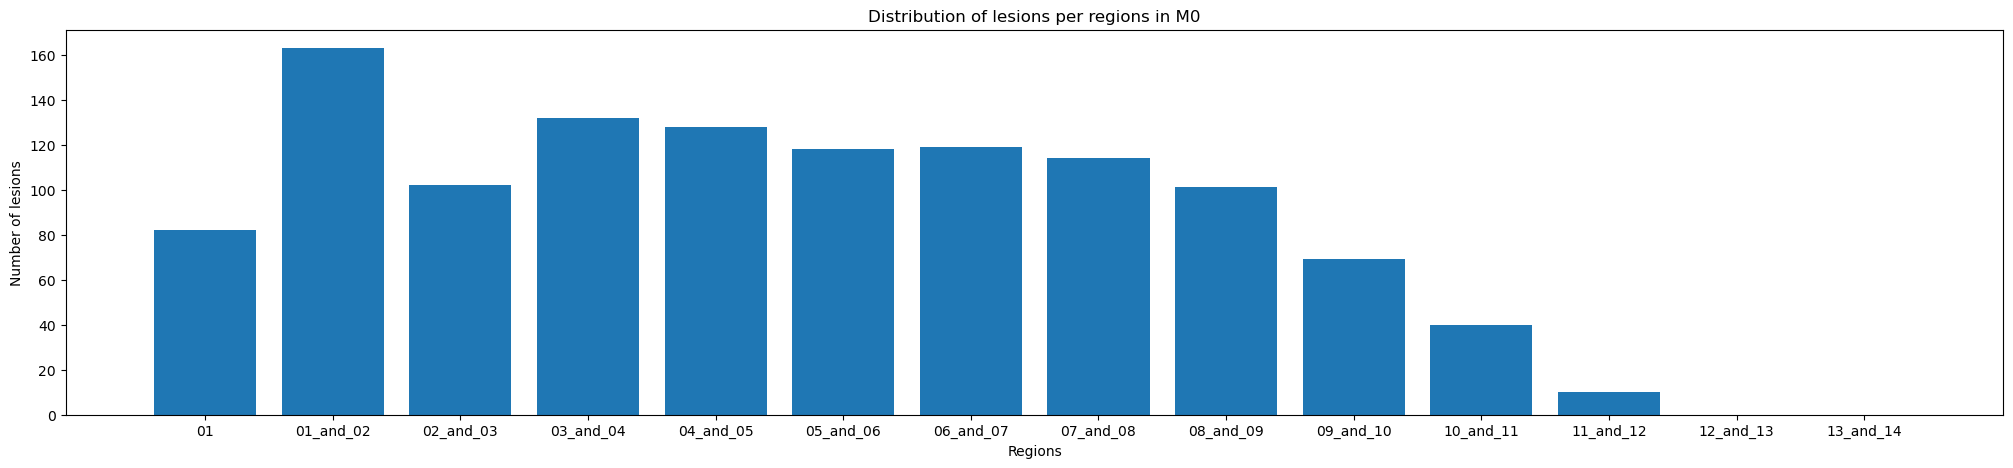

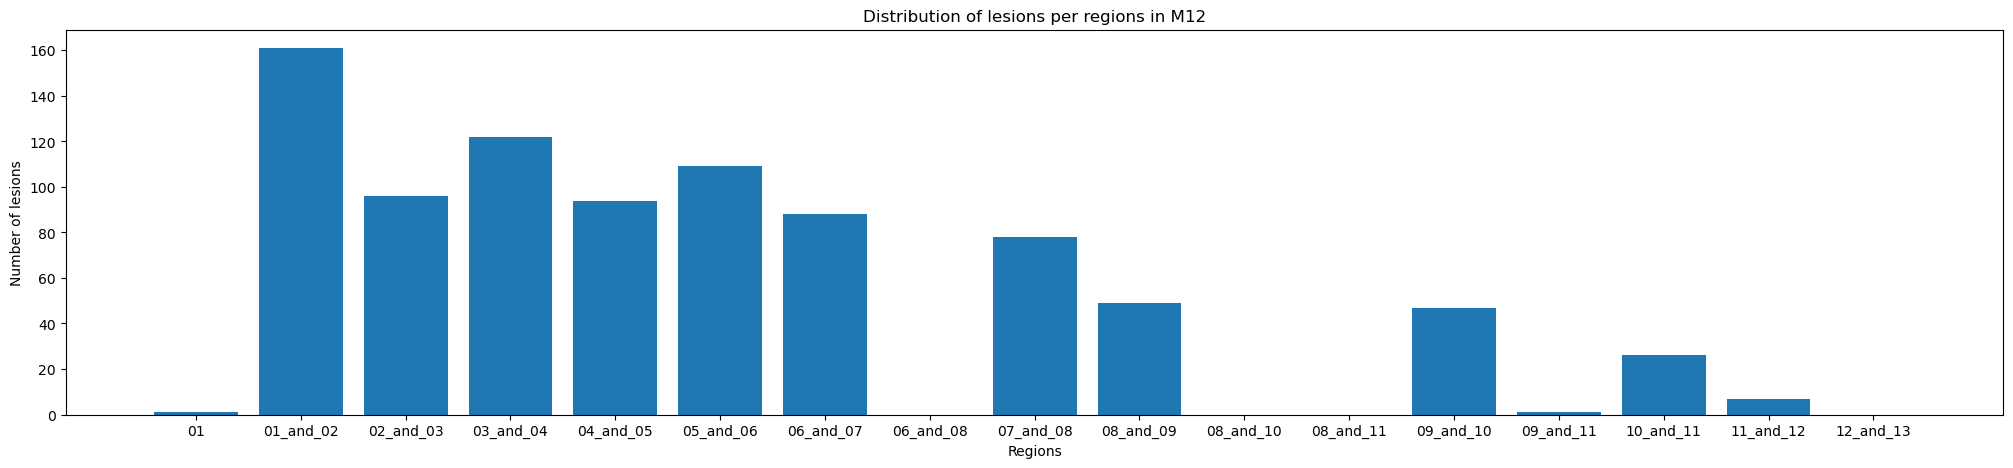

In [10]:
# we get the column names of the dataframe corresponding to the regions
regions = df_M0.columns
regions = [str(column) for column in regions if 'lesions_between' in column or 'lesions_above' in column]
regions = np.sort(regions)

# we output the hist plot of the distribution of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',3)[-1] for region in regions]
plt.bar(legend, df_M0[regions].sum())
plt.title('Distribution of lesions per regions in M0')
plt.xlabel('Regions')
plt.ylabel('Number of lesions')
plt.show()

#we output the same thing for M12  
regions = df_M12.columns
regions = [str(column) for column in regions if 'lesions_between' in column or 'lesions_above' in column]
regions = np.sort(regions)

plt.figure(figsize=(25, 5))
legend = [region.split('_',3)[-1] for region in regions]
plt.bar(legend, df_M12[regions].sum())
plt.title('Distribution of lesions per regions in M12')
plt.xlabel('Regions')
plt.ylabel('Number of lesions')
plt.show()

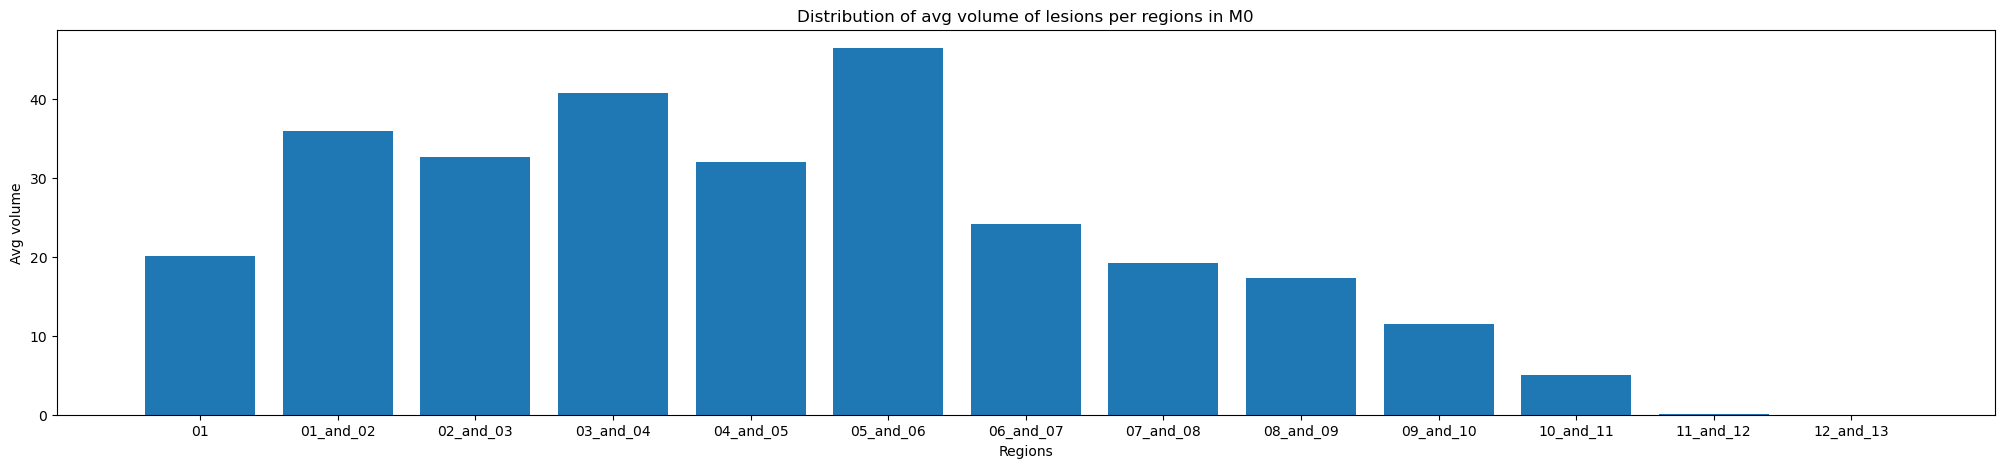

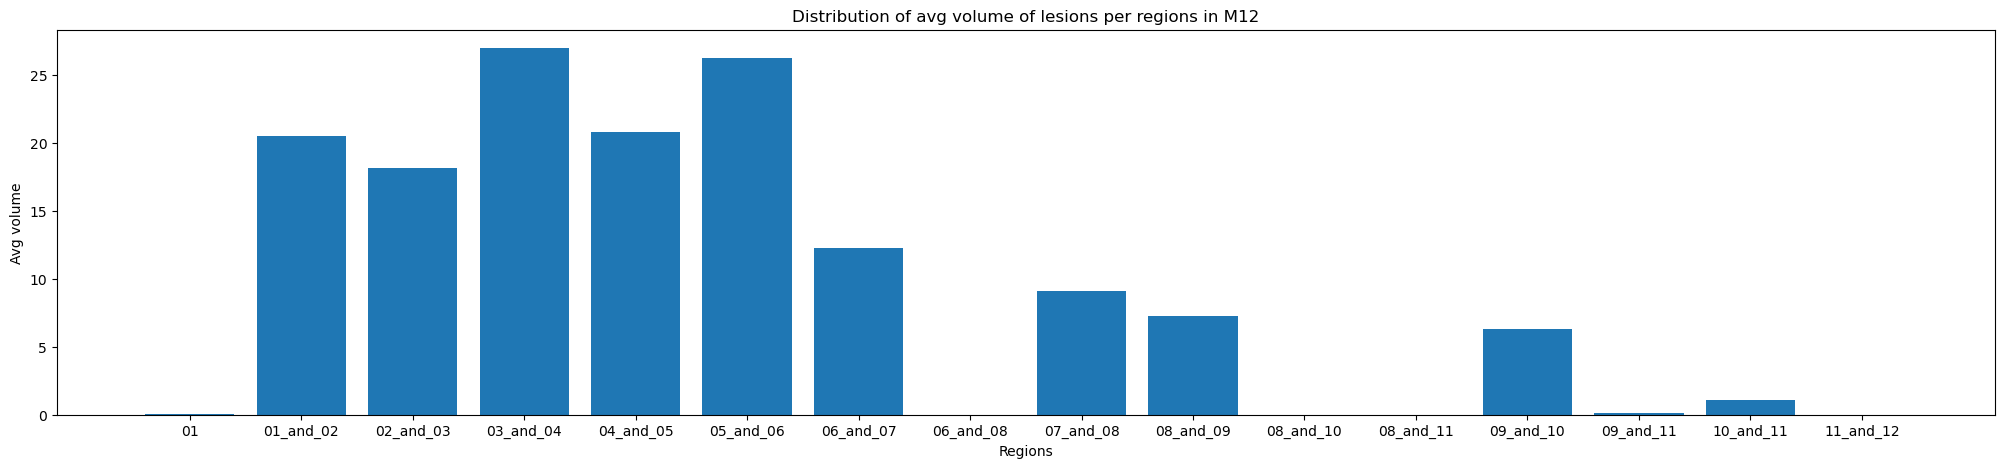

In [11]:
## we do the same thing for the avg volume of lesions
# we get the column names of the dataframe corresponding to the regions
regions = df_M0.columns
regions = [str(column) for column in regions if 'avg_lesion_volume_between' in column or 'avg_lesion_volume_above' in column]
regions = np.sort(regions)

# we output the hist plot of the distribution of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',4)[-1] for region in regions]
plt.bar(legend, df_M0[regions].mean())
plt.title('Distribution of avg volume of lesions per regions in M0')
plt.xlabel('Regions')
plt.ylabel('Avg volume')
plt.show()

#we output the same thing for M12  
regions = df_M12.columns
regions = [str(column) for column in regions if 'avg_lesion_volume_between' in column or 'avg_lesion_volume_above' in column]
regions = np.sort(regions)

plt.figure(figsize=(25, 5))
legend = [region.split('_',4)[-1] for region in regions]
plt.bar(legend, df_M12[regions].mean())
plt.title('Distribution of avg volume of lesions per regions in M12')
plt.xlabel('Regions')
plt.ylabel('Avg volume')
plt.show()


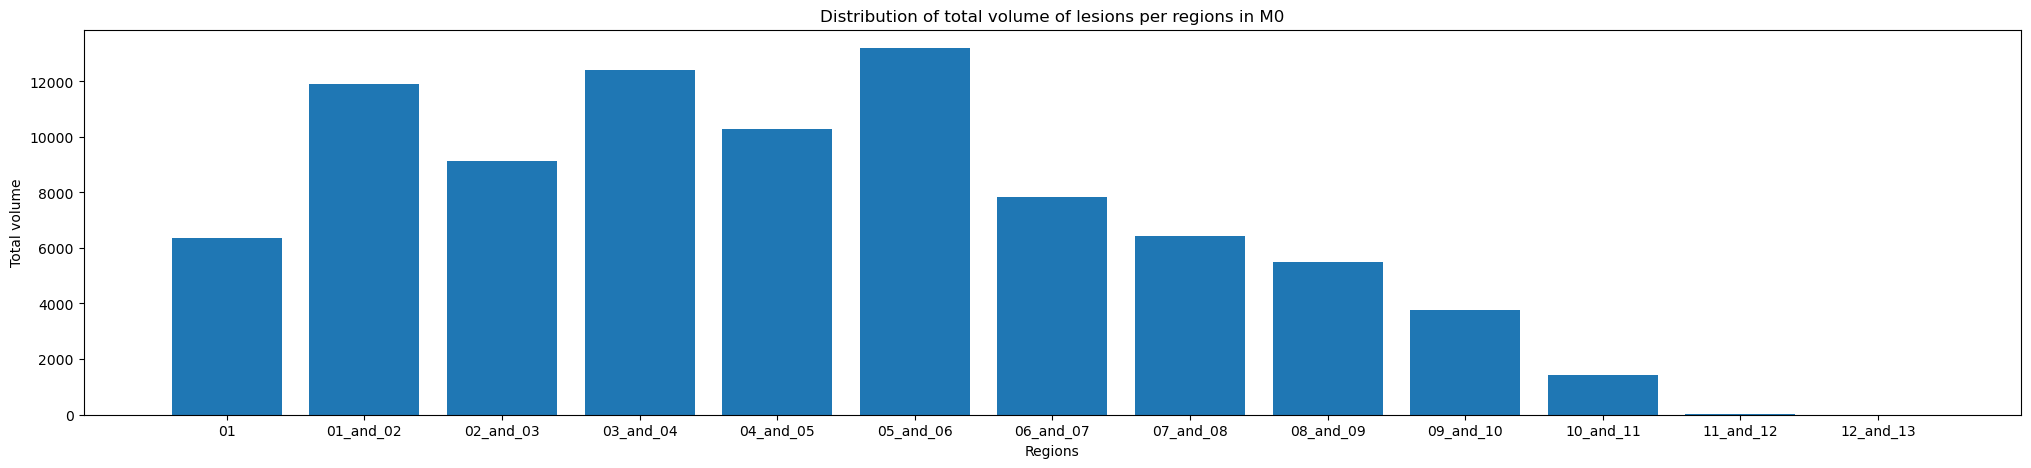

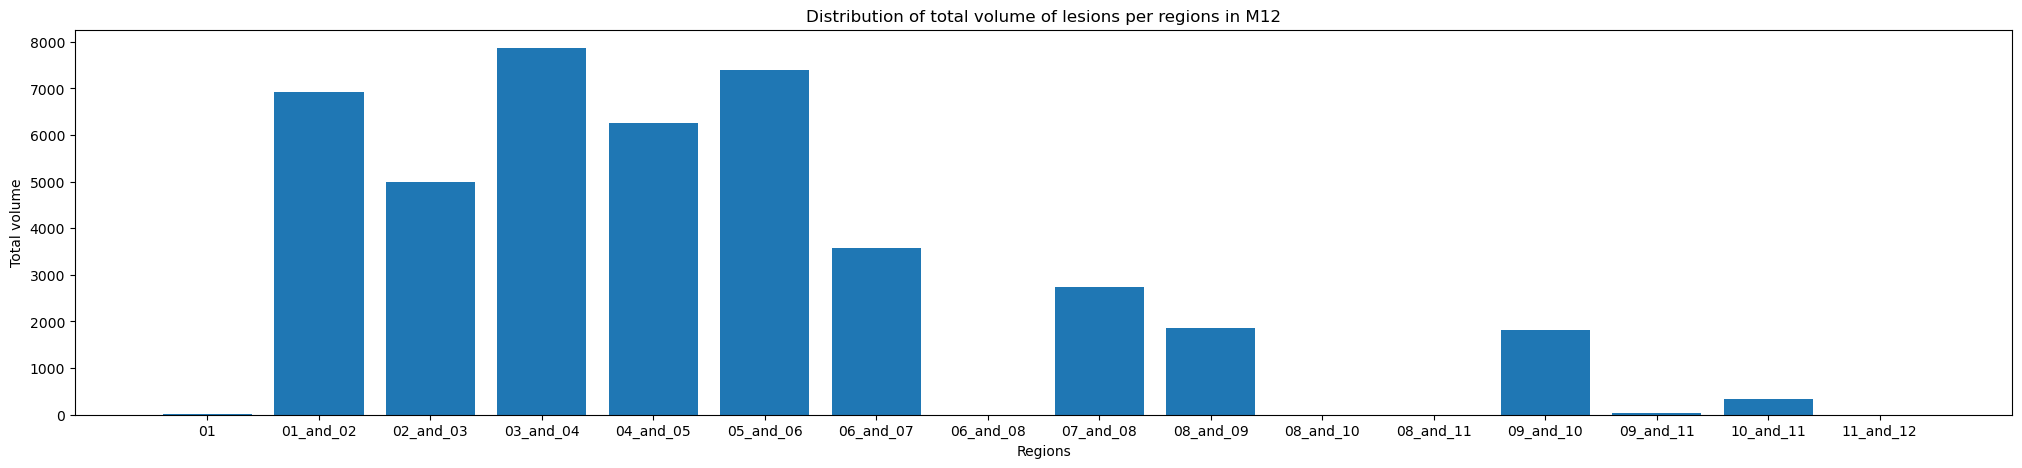

In [12]:
## we do the same thing for the total volume of lesions
# we get the column names of the dataframe corresponding to the regions
regions = df_M0.columns
regions = [str(column) for column in regions if 'total_lesion_volume_between' in column or 'total_lesion_volume_above' in column]
regions = np.sort(regions)

# we output the hist plot of the distribution of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',4)[-1] for region in regions]
plt.bar(legend, df_M0[regions].sum())
plt.title('Distribution of total volume of lesions per regions in M0')
plt.xlabel('Regions')
plt.ylabel('Total volume')
plt.show()

#we output the same thing for M12  
regions = df_M12.columns
regions = [str(column) for column in regions if 'total_lesion_volume_between' in column or 'total_lesion_volume_above' in column]
regions = np.sort(regions)

plt.figure(figsize=(25, 5))
legend = [region.split('_',4)[-1] for region in regions]
plt.bar(legend, df_M12[regions].sum())
plt.title('Distribution of total volume of lesions per regions in M12')
plt.xlabel('Regions')
plt.ylabel('Total volume')
plt.show()

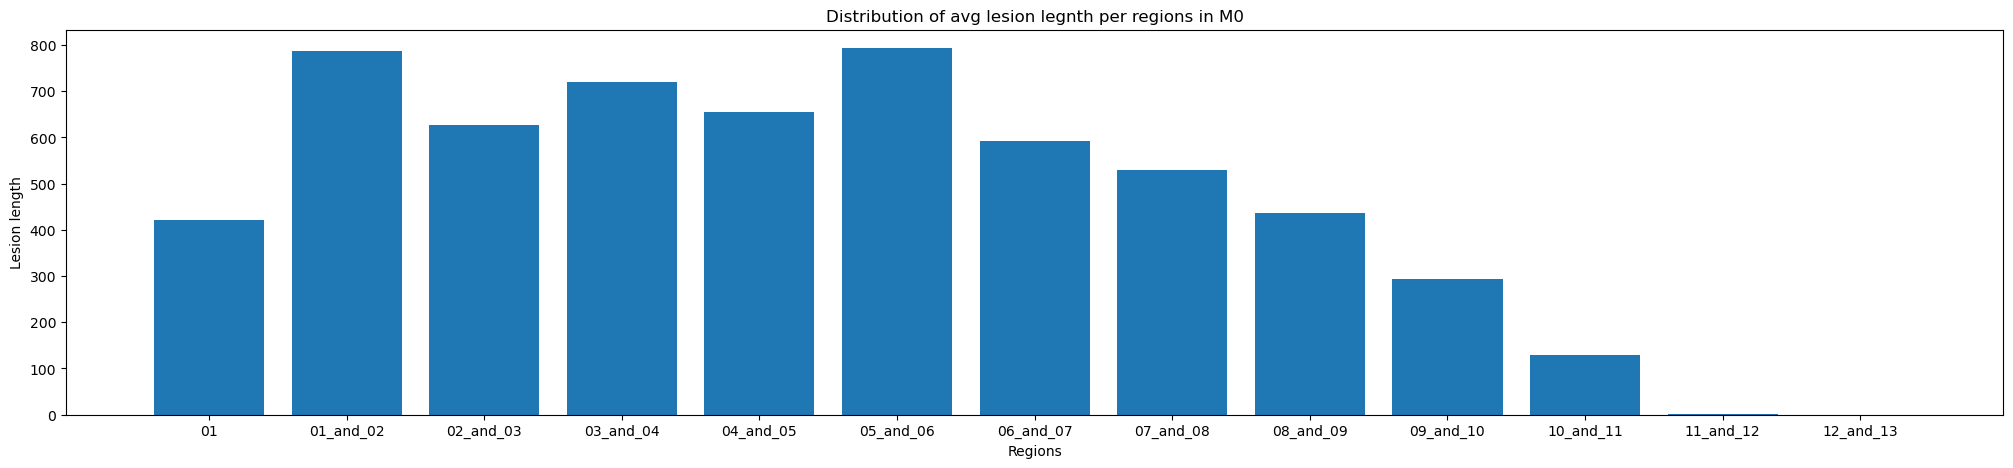

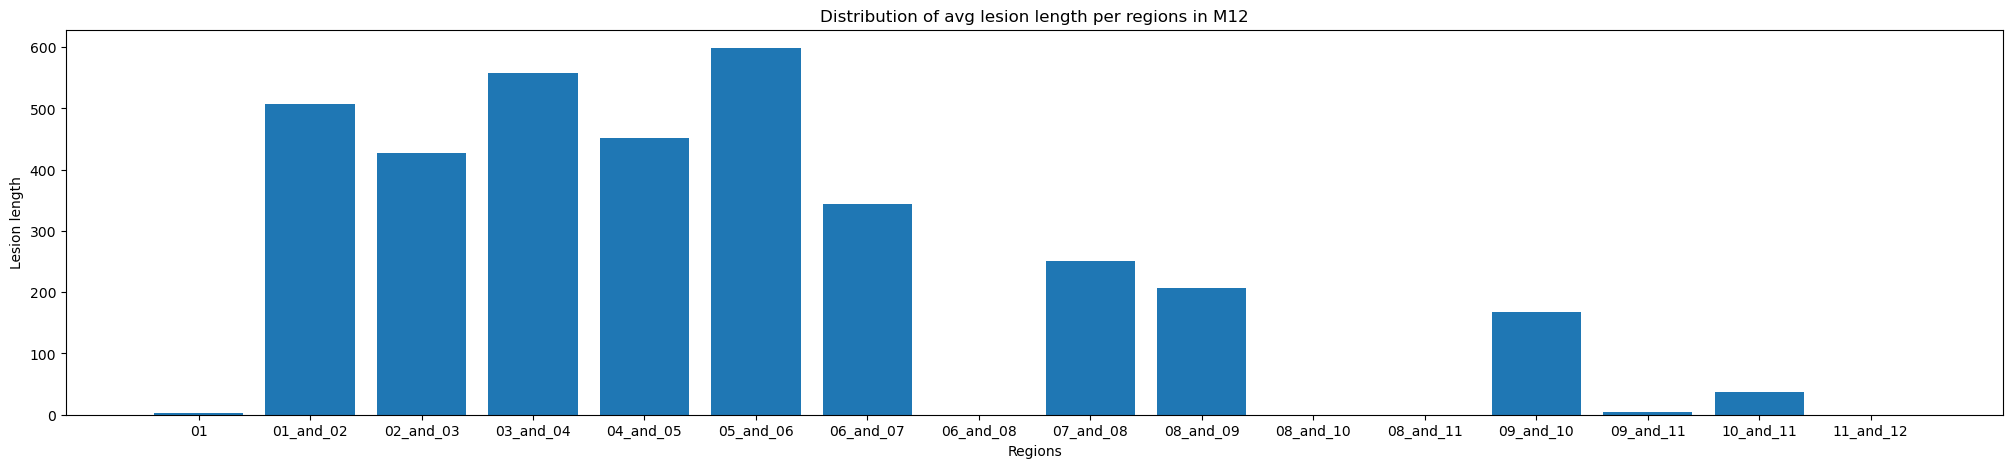

In [13]:
## we do the same thing for avg length of lesions
# we get the column names of the dataframe corresponding to the regions
regions = df_M0.columns
regions = [str(column) for column in regions if 'avg_lesion_length_between' in column or 'avg_lesion_length_above' in column]
regions = np.sort(regions)

# we output the hist plot of the distribution of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',4)[-1] for region in regions]
plt.bar(legend, df_M0[regions].sum())
plt.title('Distribution of avg lesion legnth per regions in M0')
plt.xlabel('Regions')
plt.ylabel('Lesion length')
plt.show()

#we output the same thing for M12  
regions = df_M12.columns
regions = [str(column) for column in regions if 'avg_lesion_length_between' in column or 'avg_lesion_length_above' in column]
regions = np.sort(regions)

plt.figure(figsize=(25, 5))
legend = [region.split('_',4)[-1] for region in regions]
plt.bar(legend, df_M12[regions].sum())
plt.title('Distribution of avg lesion length per regions in M12')
plt.xlabel('Regions')
plt.ylabel('Lesion length')
plt.show()

We look into the correlation between the edss score and the total lesion volume per level. 

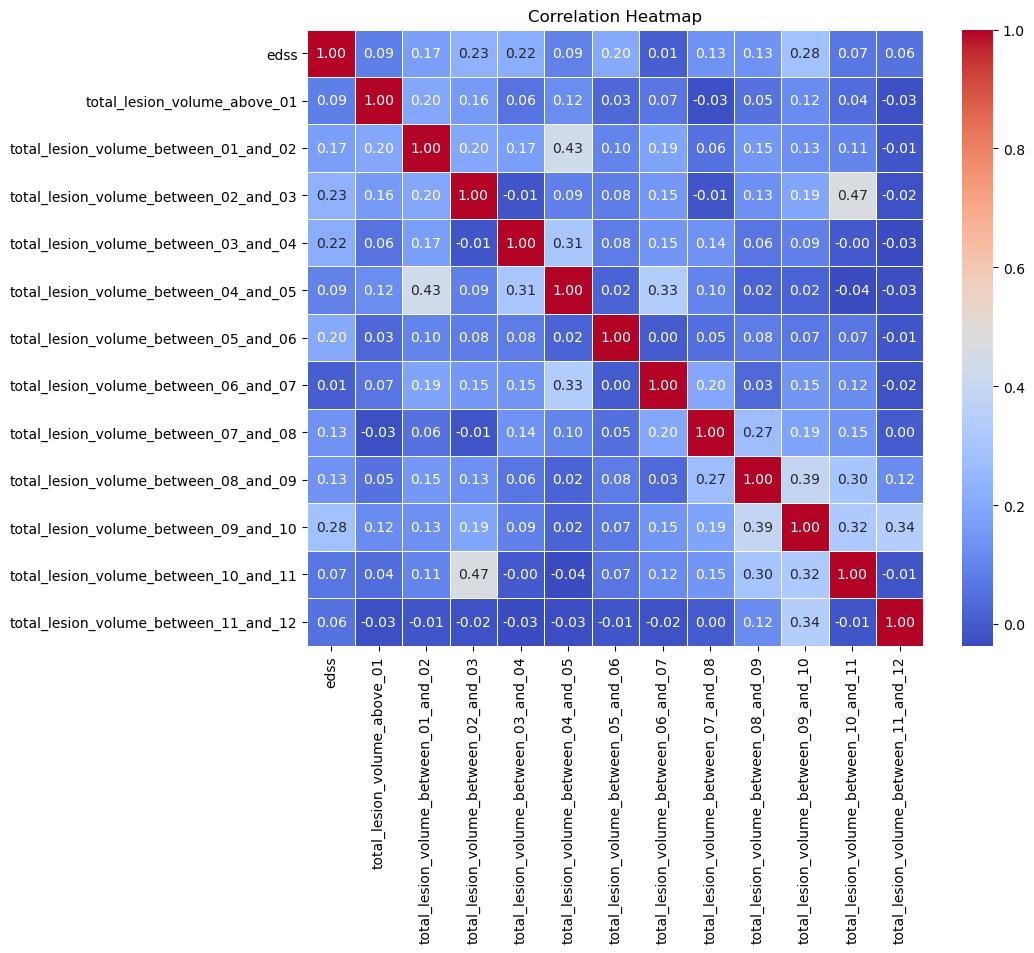

In [14]:
# now we build a correlation matrix for the avg lesion volume and the edss score
# we get the column names of the dataframe corresponding to the regions
regions = df_M0.columns
regions = [str(column) for column in regions if 'total_lesion_volume_between' in column or 'total_lesion_volume_above' in column]
regions += ['edss']
#we remove the columns with no values
regions = [region for region in regions if '13' not in region]
regions = np.sort(regions)

corr_df = df_M0[regions].corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
df_M12_path_2d = '/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/dataframes/dataframe_M12_2d/dataframe.csv'
df_M12_all_2d = pd.read_csv(df_M12_path_2d)

#removall of HC
df_M12_2d = df_M12_all_2d[df_M12_all_2d.pathology != 'HC']

#we add the timepoint to the dataframe 
df_M12_2d['timepoint'] = 'M12'

#replace NaN values by 0
df_M12_2d = df_M12_2d.fillna(0)

#we print a table with the average nb of lesion per patient, average lesion volume and average lesion volume per lesion
table = PrettyTable()
table.field_names = ['', 'M0', 'M12 3d', 'M12 2d' ]
table.add_row(['Mean nb of lesions per patient (median | std)', str(round(df_M0.number_of_lesions.mean(),2)) + " (" + str(round(df_M0.number_of_lesions.median(),2)) +" | "+ str(round(df_M0.number_of_lesions.std(),2)) + ")",
                str(round(df_M12.number_of_lesions.mean(),2)) + " (" + str(round(df_M12.number_of_lesions.median(),2)) +" | "+ str(round(df_M12.number_of_lesions.std(),2)) + ")",
                str(round(df_M12_2d.number_of_lesions.mean(),2)) + " (" + str(round(df_M12_2d.number_of_lesions.median(),2)) +" | "+ str(round(df_M12_2d.number_of_lesions.std(),2)) + ")"])
table.add_row(['Mean lesion volume (mm3) (median | std)', str(round(df_M0.total_lesion_volume.mean(),2)) + " (" + str(round(df_M0.total_lesion_volume.median(),2)) +" | "+ str(round(df_M0.total_lesion_volume.std(),2)) + ")",
                str(round(df_M12.total_lesion_volume.mean(),2)) + " (" + str(round(df_M12.total_lesion_volume.median(),2)) +" | "+ str(round(df_M12.total_lesion_volume.std(),2)) + ")",
                str(round(df_M12_2d.total_lesion_volume.mean(),2)) + " (" + str(round(df_M12_2d.total_lesion_volume.median(),2)) +" | "+ str(round(df_M12_2d.total_lesion_volume.std(),2)) + ")"])
table.add_row(['Mean biggest lesion volume (mm3) (median | std)', str(round(df_M0.biggest_lesion_vol.mean(),2)) + " (" + str(round(df_M0.biggest_lesion_vol.median(),2)) +" | "+ str(round(df_M0.biggest_lesion_vol.std(),2)) + ")",
                str(round(df_M12.biggest_lesion_vol.mean(),2)) + " (" + str(round(df_M12.biggest_lesion_vol.median(),2)) +" | "+ str(round(df_M12.biggest_lesion_vol.std(),2)) + ")",
                str(round(df_M12_2d.biggest_lesion_vol.mean(),2)) + " (" + str(round(df_M12_2d.biggest_lesion_vol.median(),2)) +" | "+ str(round(df_M12_2d.biggest_lesion_vol.std(),2)) + ")"])

print(table)

+-------------------------------------------------+--------------------------+-------------------------+-------------------------+
|                                                 |            M0            |          M12 3d         |          M12 2d         |
+-------------------------------------------------+--------------------------+-------------------------+-------------------------+
|  Mean nb of lesions per patient (median | std)  |    4.71 (3.0 | 4.33)     |    3.49 (3.0 | 2.72)    |    3.55 (3.0 | 3.16)    |
|     Mean lesion volume (mm3) (median | std)     | 360.47 (232.73 | 449.52) | 177.46 (97.84 | 238.77) | 190.84 (88.79 | 263.25) |
| Mean biggest lesion volume (mm3) (median | std) | 157.41 (99.96 | 275.66)  |  94.99 (52.92 | 144.37) |  94.58 (48.21 | 122.09) |
+-------------------------------------------------+--------------------------+-------------------------+-------------------------+


/var/folders/39/xt15x04d55900qfkrrsvtymw0000gn/T/ipykernel_23213/1423961972.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M12_2d['timepoint'] = 'M12'


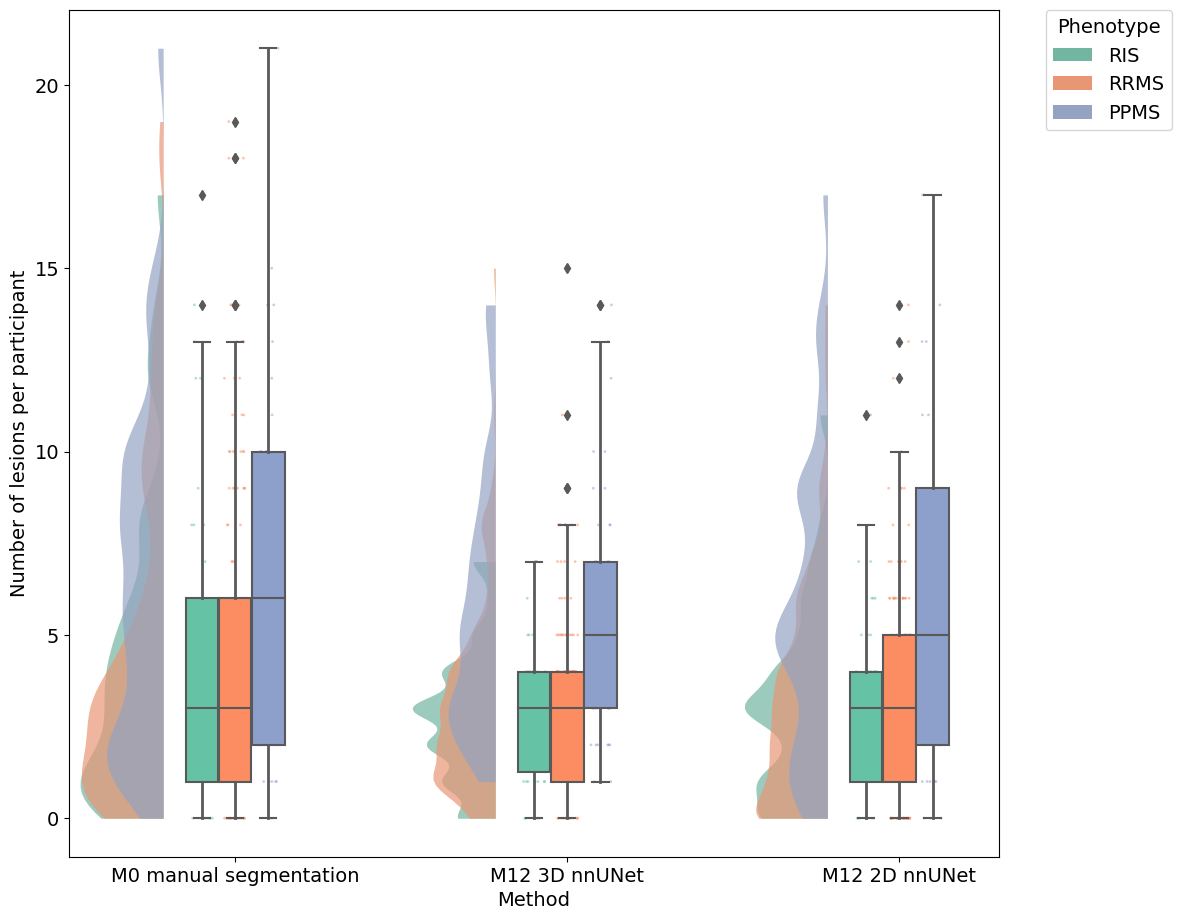

In [16]:
# plot
df1 = df_M0.copy()
df1['Method']='M0 manual segmentation'
df2 = df_M12.copy()
df2['Method']='M12 3D nnUNet'
df3 = df_M12_2d.copy()
df3['Method']='M12 2D nnUNet'

df123 = pd.concat([df1, df2, df3])

#rename columns 
df123 = df123.rename(columns={'number_of_lesions': 'Number of lesions per participant', 'phenotype': 'Phenotype', 'total_lesion_volume': 'Total lesion volume (mm3)', 'biggest_lesion_vol': 'Biggest lesion volume (mm3)', 'avg_lesion_length': 'Average lesion length (mm)'})
plt.rcParams.update({'font.size': 14})
f, ax = plt.subplots(figsize=(12, 11))
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Number of lesions per participant',
                          hue='Phenotype',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=True,  # show mean value inside the boxplots
                          box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                                         'markersize': '6'},
                          hue_order=['RIS','RRMS','PPMS'],
                          box_medianprops={"zorder": 11}
                                         
                          )
plt.show()

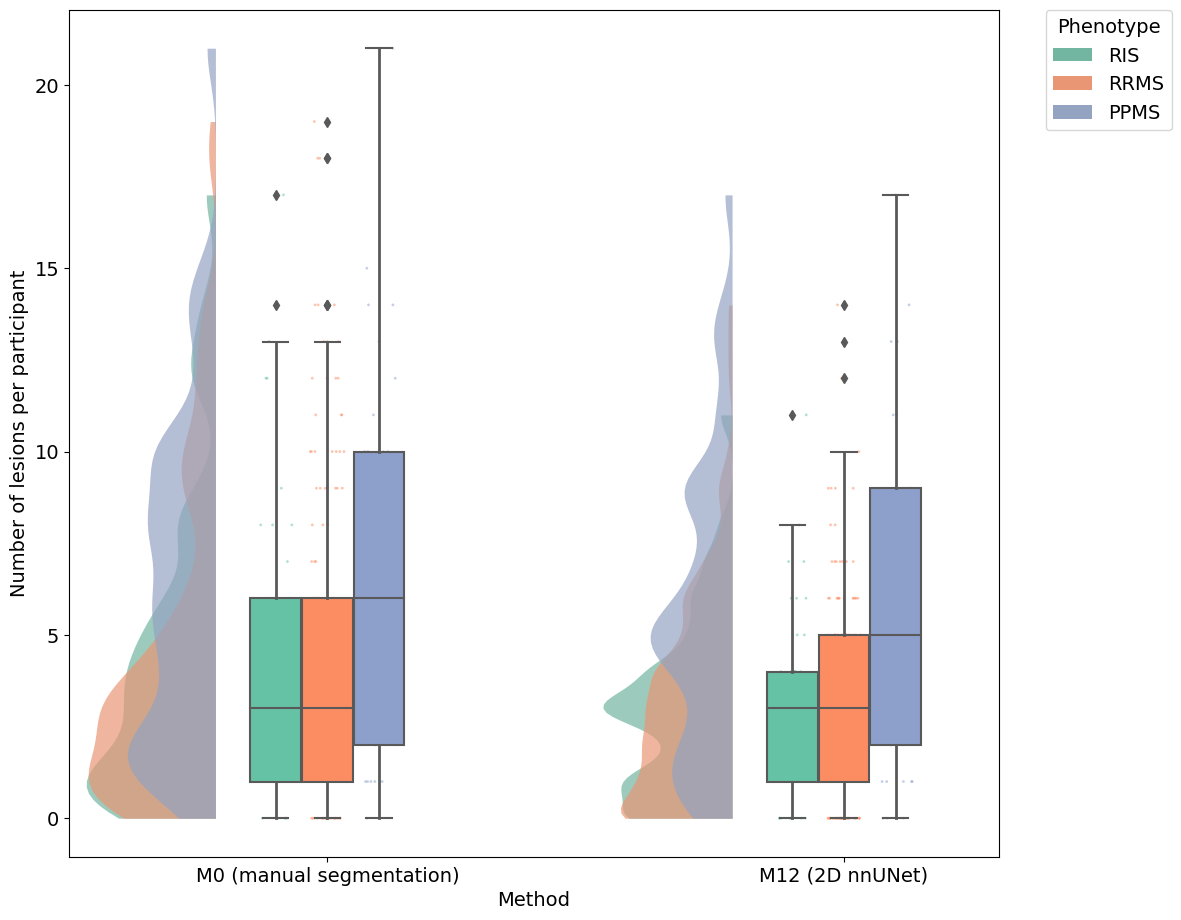

In [17]:
# plot
df1 = df_M0.copy()
df1['Method']='M0 (manual segmentation)'
df3 = df_M12_2d.copy()
df3['Method']='M12 (2D nnUNet)'

df13 = pd.concat([df1, df3])

#rename columns 
df123 = df13.rename(columns={'number_of_lesions': 'Number of lesions per participant', 'phenotype': 'Phenotype', 'total_lesion_volume': 'Total lesion volume (mm3)', 'biggest_lesion_vol': 'Biggest lesion volume (mm3)', 'avg_lesion_length': 'Average lesion length (mm)'})
plt.rcParams.update({'font.size': 14})
f, ax = plt.subplots(figsize=(12, 11))
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Number of lesions per participant',
                          hue='Phenotype',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=True,  # show mean value inside the boxplots
                          box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                                         'markersize': '6'},
                          hue_order=['RIS','RRMS','PPMS'],
                          box_medianprops={"zorder": 11}               
                          )
plt.show()

In [18]:
# compute wilcoxon test for the number of lesions
from scipy.stats import wilcoxon
from scipy.stats import normaltest

method_M0 = df123[df123['Method'] == 'M0 (manual segmentation)']['Number of lesions per participant'].dropna()
method_M12 = df123[df123['Method'] == 'M12 (2D nnUNet)']['Number of lesions per participant'].dropna()

#we check if the distribution is normal or not
stat, p = normaltest(method_M0)
print('Statistics=%.3f, p=%.4f' % (stat, p))
print('Distribution is not nornmal : we have to use the Wilcoxon signed-rank test \n')

# Perform the Wilcoxon signed-rank test
wilcoxon_stat, p_value = wilcoxon(method_M0, method_M12)

print("Wilcoxon Statistic:", wilcoxon_stat)
print("P-value:", p_value)
print("\n")

# iterate accross phenotypes
for phenotype in ['RIS','RRMS','PPMS']:
    print('Phenotype: ', phenotype)
    method_M0_phenotype = df123[(df123['Method'] == 'M0 (manual segmentation)') & (df123['Phenotype'] == phenotype)]['Number of lesions per participant'].dropna()
    method_M12_phenotype = df123[(df123['Method'] == 'M12 (2D nnUNet)') & (df123['Phenotype'] == phenotype)]['Number of lesions per participant'].dropna()
    # Perform the Wilcoxon signed-rank test
    wilcoxon_stat, p_value = wilcoxon(method_M0_phenotype, method_M12_phenotype)
    print("Wilcoxon Statistic:", wilcoxon_stat)
    print("P-value:", p_value)
    print('\n')

Statistics=45.913, p=0.0000
Distribution is not nornmal : we have to use the Wilcoxon signed-rank test 

Wilcoxon Statistic: 5117.0
P-value: 9.773776971792964e-08


Phenotype:  RIS
Wilcoxon Statistic: 204.5
P-value: 0.02575209682849685


Phenotype:  RRMS
Wilcoxon Statistic: 1777.5
P-value: 1.2024572288004824e-05


Phenotype:  PPMS
Wilcoxon Statistic: 239.0
P-value: 0.03365938920870582




/usr/local/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
